Set up a Hive connection using pyhs2 and access a db table called 'boston_leaks'

In [1]:
import pyhs2
import pandas as pd 

from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

with pyhs2.connect(host='localhost',
                   port=10000,
                   authMechanism="PLAIN",
                   user='root',
                   password='test',
                   database='default') as conn:
    with conn.cursor() as cur:
    	#Show databases
    	print cur.getDatabases()

    	#Execute query
        sql = "select * from boston_leaks"
        cur.execute(sql)

        #Return column info from query
        columnNames = ['Location', 'Leak_no', 'WO_no', 'Description', 'Severity', 'X_coord', 'Y_coord', 'Days_open']
        print columnNames
        #columnNamesStrings = [a['columnName'] for a in  cur.getSchema() if a['type']=='STRING_TYPE'] 
        data =  pd.DataFrame(cur.fetch(),columns=columnNames)

[['default', ''], ['xademo', '']]
['Location', 'Leak_no', 'WO_no', 'Description', 'Severity', 'X_coord', 'Y_coord', 'Days_open']


In [2]:
type(data)

pandas.core.frame.DataFrame

The data object is a DataFrame, a Pandas type consisting of a two-dimensional labeled data structure with columns of potentially different types (like a Excel spreadsheet). Like a NumPy array, the shape attribute returns the shape of the table. But unlike NumPy, the DataFrame object has a richer structure, and in particular the keys methods returns the names of the different columns.

In [3]:
data.shape, data.keys()

((222, 8),
 Index([u'Location', u'Leak_no', u'WO_no', u'Description', u'Severity',
        u'X_coord', u'Y_coord', u'Days_open'],
       dtype='object'))

We can see that data has more than 222 lines, and eight columns including the severity, no of days open and GPS coordinates of each city. The head and tail methods allow to take a quick look to the beginning and the end of the table, respectively.

In [4]:
data.tail()

,Location,Leak_no,WO_no,Description,Severity,X_coord,Y_coord,Days_open
217,POINT (-71.077641094558487 42.340802885315512),1775386,1008771,711 TREMONT STBOS,1,234804.147,899009.395,21
218,POINT (-71.078535178832212 42.350678652238294),1779085,1009489,167 NEWBURY STBOS,3,234725.051,900105.982,58
219,POINT (-71.090089798335853 42.350678387067198),1779105,1009503,503 BEACON STBOS,3,233773.058,900101.313,56
220,POINT (-71.064039452639747 42.34333367021636),1779965,1009786,160 E BERKELEY STBOS,3,235923.533,899296.141,34
221,POINT (-71.078097533150299 42.340438592009932),1790046,1012166,725 TREMONT STBOS,1,234766.735,898968.745,2


We'll see in the next sections what we can actually do with these data.

Each column of the DataFrame object can be accessed with its name and filterd by attributes 

In [5]:
data.Severity

0      3
1      3
2      3
3      3
4      3
5      3
6      3
7      3
8      3
9      3
10     3
11     3
12     3
13     3
14     3
15     3
16     3
17     3
18     3
19     3
20     3
21     3
22     3
23     3
24     3
25     3
26     3
27     3
28     3
29     3
      ..
192    2
193    2
194    3
195    2
196    3
197    2
198    3
199    2
200    2
201    0
202    2
203    0
204    3
205    3
206    0
207    2
208    0
209    2
210    2
211    2
212    3
213    3
214    2
215    2
216    2
217    1
218    3
219    3
220    3
221    1
Name: Severity, dtype: int64

In [6]:
data[data.Severity==2]

,Location,Leak_no,WO_no,Description,Severity,X_coord,Y_coord,Days_open
90,POINT (-71.0771347637248 42.335619114067697),269235,403711,115 NORTHAMPTON ST BOS,2,234848.725,898433.815,400
119,POINT (-71.101699881046116 42.342414338514445),325036,685066,235 PARK DRBOS,2,232820.781,899178.850,37
184,POINT (-71.078340785188317 42.3366379410391),1540329,966677,160 NORTHAMPTON STBOS,2,234748.777,898546.489,263
185,POINT (-71.058741754347935 42.353288226082071),1598457,976220,85 BEDFORD STBOS,2,236354.344,900404.088,237
186,POINT (-71.094876015347296 42.342861529452364),1598504,976250,55 PARK DRBOS,2,233382.842,899231.170,237
187,POINT (-71.067760961153169 42.340848335392472),1600664,976668,HARRISON AVEBOS,2,235618.279,899018.522,239
188,POINT (-71.062516539443862 42.342842699545187),1601476,976807,307 ALBANY STBOS,2,236049.301,899242.249,264
192,POINT (-71.070498934883886 42.345932404251343),1630947,982732,35 BERKELEY STBOS,2,235389.817,899582.095,190
193,POINT (-71.076461591489021 42.343093176929528),1635977,983856,196 W BROOKLINE STBOS,2,234900.079,899264.271,185
195,POINT (-71.072999108936258 42.33325856025742),1656871,987237,784 MASSACHUSETTS AVEBOS,2,235190.858,898173.315,171


The same syntax works in NumPy and Pandas. Here, we find a number of leaks of severity 2. To access a single element with Pandas, we can use the .ix attribute (for index):

In [7]:
index = 90
data.ix[index]

Location       POINT (-71.0771347637248 42.335619114067697)
Leak_no                                              269235
WO_no                                                403711
Description                          115 NORTHAMPTON ST BOS
Severity                                                  2
X_coord                                            234848.7
Y_coord                                            898433.8
Days_open                                               400
Name: 90, dtype: object

Now, let's turn this Series object into a pure NumPy array. We go from the Pandas world to NumPy (keeping in mind that Pandas is built on top of NumPy). We'll mostly work with the population count of all cities.

In [8]:
import numpy as np 
days_open = np.array(data.Days_open)

In [9]:
days_open.shape

(222,)

In [10]:
days_open[index]

400

In [12]:
np.isnan(days_open)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [13]:
x = days_open[~_]
len(x), len(x) / float(len(days_open))

(222, 1.0)

All of the leaks reported have a 'days open' count.

Let's explore now some statistics on the leaks days open.

In [14]:
x.mean()

2573.9594594594596

In [15]:
x.sum() / 1e3

571.41899999999998

In [16]:
data.Days_open.describe()

count      222.000000
mean      2573.959459
std       2073.948328
min          2.000000
25%        516.750000
50%       2173.000000
75%       4097.750000
max      10651.000000
Name: Days_open, dtype: float64

In [17]:
x = data.Severity
y = data.Days_open

Plot histogram for the leaks by severity and days open

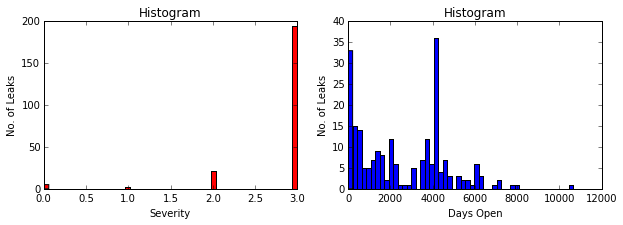

In [18]:
#fig = plt.figure()
fig, axes = plt.subplots(1, 2, figsize=(10,3))

axes[0].hist(x, 50, facecolor='r')
axes[0].set_xlabel('Severity')
axes[0].set_ylabel('No. of Leaks')
axes[0].set_title('Histogram');

axes[1].hist(y, 50, facecolor='b')
axes[1].set_xlabel('Days Open')
axes[1].set_ylabel('No. of Leaks')
axes[1].set_title('Histogram');

For more information on customizing this graph see here http://nbviewer.ipython.org/github/htapia/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb

In [ ]:
fig.savefig("filename.png")

Need to create a Lat/Long array

In [ ]:
coords = pd.Series(data.Location)
type(coords)
str_coords = coords.str[1:-1].str.split(' ')
long = str_coords.str[1].str.split('(')
coords_df = pd.DataFrame({'lat': str_coords.str[2], 'lon': long.str[1]})
coords_df.astype(str).head()

In [ ]:
coords_df.shape

In [ ]:
print coords_df

In [ ]:
#plot(coords_df.lon, coords_df.lat, ',')
fig, axes = plt.scatter(coords_df.lon[:,0], coords_df.lat[:,1])

In [ ]:
plt.scatter(coords_df.lon[:,0], coords_df[:,1]);

In [ ]:
# function to read HDFS file into dataframe using PyDoop
import pydoop.hdfs as hdfs
def read_csv_from_hdfs(path, cols, col_types=None):
  files = hdfs.ls(path);
  pieces = []
  for f in files:
    fhandle = hdfs.open(f)
    pieces.append(pd.read_csv(fhandle, names=cols, dtype=col_types))
    fhandle.close()
  return pd.concat(pieces, ignore_index=True)

In [ ]:
%%writefile preprocess1.pig

ORD_2007 = data.Severity
rmf airline/fm/ord_2007_1
store ORD_2007 into 'airline/fm/ord_2007_1' using PigStorage(',');

In [ ]:
%%writefile preprocess1.pig

#Register 'util.py' USING jython as util;
DEFINE preprocess(year_str, airport_code) returns data
{
    -- load airline data from specified year (need to specify fields since it's not in HCat)
        airline = load 'airline/delay/$year_str.csv' using PigStorage(',') 
            as (Year: int, Month: int, DayOfMonth: int, DayOfWeek: int, DepTime: chararray, 
                CRSDepTime: chararray, ArrTime, CRSArrTime, Carrier: chararray, FlightNum, TailNum, ActualElapsedTime, 
                CRSElapsedTime, AirTime, ArrDelay, DepDelay: int, Origin: chararray, Dest: chararray, Distance: int, 
                TaxiIn, TaxiOut, Cancelled: int, CancellationCode, Diverted, CarrierDelay, WeatherDelay, 
                NASDelay, SecurityDelay, LateAircraftDelay);

        -- keep only instances where flight was not cancelled and originate at ORD
        airline_flt = filter airline by Cancelled == 0 and Origin == '$airport_code';

        -- Keep only fields I need
        $data = foreach airline_flt generate DepDelay as delay, Month, DayOfMonth, DayOfWeek, 
                                             util.get_hour(CRSDepTime) as hour, Distance, Carrier, Dest,
                                             util.days_from_nearest_holiday(Year, Month, DayOfMonth) as hdays;
};

ORD_2007 = preprocess('2007', 'ORD');
rmf airline/fm/ord_2007_1
store ORD_2007 into 'airline/fm/ord_2007_1' using PigStorage(',');

In [ ]:
%%bash --err pig_out --bg 
pig -f preprocess1.pig

In [ ]:
while True:
    line = pig_out.readline()
    if not line: 
        break
    sys.stdout.write("%s" % line)
    sys.stdout.flush()